<a href="https://colab.research.google.com/github/BiancaCordeiro/biomec/blob/main/BiancaCordeiro_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova 2 - Biomecânica I 2022

> **Nome**: Bianca Cordeiro Anselmo Ramos        
> **RA**: 11201922302



---
$\color{red}{\textbf{Sobre a prova:}}$  
- A prova deve ser entregue até $\color{red}{\text{23h59 min do dia 11/12/2022 (domingo)}}$. Não serão aceitas provas entregues após data e horário estipulado.  
- A prova deve ser feita individualmente.
- Se for detectado qualquer plágio na realização da prova, será atribuída nota zero para todos os envolvidos no plágio.
- Deve ser entregue a solução computacional nesse notebook (arquivo com extensão .ipynb, Jupyter ou Colab).  
- Nomeie o notebook com seu nome seguido por _P2 e a extensão ipynb.
- O notebook deve ser possível de executar e reproduzir os cálculos computacionais em Python e estar bem redigido.  
- Dica: Para verificar que seu notebook executa tudo como planejado no Google Colab, selecione a opção "Reiniciar e executar tudo" no menu "Ambiente de execução" e confira se está tudo certo.   
---

1. Considere o arquivo com dados cinemáticos de uma análise de marcha disponível em [https://raw.githubusercontent.com/BMClab/BMC/master/data/walk.trc](https://raw.githubusercontent.com/BMClab/BMC/master/data/walk.trc) (leia o arquivo direto desta URL e não de seu Google drive).  
Nesse arquivo estão contidos as coordenadas de diversos pontos
do corpo (ver os nomes de cada marca no arquivo supplementary_material.pdf) de um sujeito enquanto ele anda. Sabe-se que o sujeito andou na direção do eixo Z das coordenadas do laboratório.   
Considerando o formalismo de ângulos de Euler:  
  a) (0.5 ponto) Determine a sequência de eixos de rotações para que a **primeira rotação** seja no plano sagital (flexão/extensão), a **segunda** no plano transversal (rotação lateral/medial) e a **terceira** no plano frontal (abdução/adução).  
  b) (0.5 ponto) Qual a matriz de rotação que resulta dessa sequência de rotações?  
  c) (1 ponto) Determine os ângulos de Euler para a **articulação do quadril (hip) do lado direito** em torno dos 3 eixos ao longo do tempo.  
  d) (0.5 ponto) Faça um gráfico para cada um dos 3 ângulos.  
  e) (0.5) Calcule e faça o gráfico de cada um dos componentes da velocidade angular da coxa direita.  

$\color{red}{\textbf{Convenções}}$ : Os arquivos anexos (os mesmos do experimento 2) detalham as convenções utilizadas. O centro articular (Joint Center) do quadril direito são as marcas 'V_R.Hip_JC_X', 'V_R.Hip_JC_Y', 'V_R.Hip_JC_Z' e para o joelho direito 'V_R.Knee_JC_X', 'V_R.Knee_JC_Y', 'V_R.Knee_JC_Z'. A letra 'V' é a inicial de Virtual porque estas marcas não podem existir fisicamente (dentro do corpo); elas foram reconstruídas a partir de uma fórmula matemática baseada em média populacional (quadril) e de marca anatômica que estava presente numa coleta denominada estática (joelho).

# **Importando bibliotecas**: Pandas, numpay, matplotlib.pyplot e sympy; **e a função** FancyArrowPatch da biblioteca matplotlib.patches

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib.patches import FancyArrowPatch

# **Importando os dados do caminhar da pessoa**
**Foi excluída a coluna unnamed: 167 (coluna 168) porque ao realizar testes, a ultima coluna com dados seria a coluna 167 (V_L.MT2_Z).**

**Para cada marca do corpo foi adicionado se a coluna se referia a marca no eixo X, Y ou Z, para que se torne mais facil de chamar certo dado e fica mais fácil de visualizar. Os dados foram convertidos para float para serem trabalhados como números ao decorrer da prova.**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BMC/master/data/walk.trc', skiprows=3, sep='\t')

data = data.drop(columns='Unnamed: 167')
nome_das_colunas = list(data.columns)
for i in range(2, len(data.columns), 3):
  coluna_aux = nome_das_colunas[i]
  nome_das_colunas[i] = coluna_aux + '_X'
  nome_das_colunas[i+1] = coluna_aux + '_Y'
  nome_das_colunas[i+2] = coluna_aux + '_Z'

data.columns = nome_das_colunas
data = data.drop(index=0)
data = data.astype(float)
data

,Frame#,Time,R.ASIS_X,R.ASIS_Y,R.ASIS_Z,L.ASIS_X,L.ASIS_Y,L.ASIS_Z,R.PSIS_X,R.PSIS_Y,...,V_R.TT_KJC_Z,V_L.TT_KJC_X,V_L.TT_KJC_Y,V_L.TT_KJC_Z,V_R.MT2_X,V_R.MT2_Y,V_R.MT2_Z,V_L.MT2_X,V_L.MT2_Y,V_L.MT2_Z
1,1.0,0.000,516.54236,966.88000,-306.10416,531.67438,981.34631,-560.16077,315.74045,977.08398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.007,523.92200,967.96594,-308.23773,539.83044,982.78345,-561.77612,323.29425,977.64166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.013,531.20807,968.92493,-310.12112,547.60663,984.00653,-563.42725,330.56866,978.15283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.020,538.24219,969.77612,-311.72064,555.40649,985.09637,-564.85162,337.63867,978.81207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,0.027,545.11420,970.81128,-313.07266,563.14301,986.00916,-566.06659,344.50589,979.21619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,180.0,1.193,1875.04834,958.35535,-290.67004,1897.06970,960.27222,-546.90094,1678.10901,977.31805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,181.0,1.200,1885.37988,958.09222,-291.67429,1907.52881,960.81549,-547.97144,1688.67249,977.12646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,182.0,1.207,1895.50452,957.80798,-292.71875,1917.97290,961.49707,-548.99799,1699.17065,977.02045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,183.0,1.213,1905.40540,957.61029,-293.84250,1928.34631,962.31494,-550.08704,1709.65186,976.93237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Ordem de rotação: XYZ**
**Considerando que a primeira rotação seja em torno do plano sagital, a segunda rotação em torno do plano transversal e a terceira rotação seja em torno do plano frontal, e como a pessoa está andando em direção ao eixo Z, pode-se concluir que a ordem de rotação será primeiro em torno de X, depois em Y e por fim em Z, assim como na imagem abaixo.**

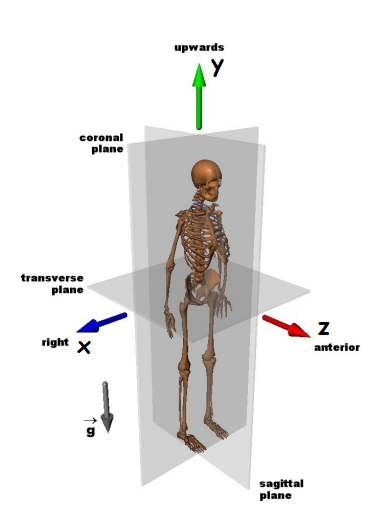

In [ ]:
from IPython.display import Image
Image(data='https://raw.githubusercontent.com/BiancaCordeiro/biomec/main/Anatomical%20coordinate%20systems.png', width= 300)

# **Abaixo encontra-se a matriz resultante da sequencia de rotação ZYX**

In [ ]:
cos, sin = sym.cos, sym.sin

a, b, g = sym.symbols('alpha, beta, gamma')

# Matrizes elementares de rotação em torno do eixo X, Y e Z, respectivamente:
RX = sym.Matrix([[1,      0,       0],
                 [0, cos(a), -sin(a)],
                 [0, sin(a), cos(a)]])

RY = sym.Matrix([[cos(b), 0,  sin(b)],
                 [0,       1,       0],
                 [-sin(b), 0,  cos(b)]])

RZ = sym.Matrix([[cos(g), -sin(g), 0],
                 [sin(g),  cos(g), 0],
                 [     0,       0, 1]])

# Multiplicação matricial seguindo a ordem de rotação definida (ZYX):
RZYX = RZ @ RY @ RX
RZYX

Matrix([
[cos(beta)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha),  sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma)],
[sin(gamma)*cos(beta), sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), -sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha)],
[          -sin(beta),                                    sin(alpha)*cos(beta),                                     cos(alpha)*cos(beta)]])

**Para definir os ângulos do quadril, primeiro é necessário definir a base do quadril e a base do femur**

# **Base do quadril**

In [ ]:
R_ASIS = data[['R.ASIS_X','R.ASIS_Y','R.ASIS_Z']].values/1000
R_PSIS =  data[['R.PSIS_X','R.PSIS_Y','R.PSIS_Z']].values/1000
v1_hip = R_PSIS - R_ASIS
v1_norma_hip = np.linalg.norm(v1_hip, axis=1, keepdims=True)
e1_hip = v1_hip/v1_norma_hip

In [ ]:
np.all(np.isclose(np.linalg.norm(e1_hip, axis=1),1))

True

In [ ]:
GT = data[['R.GTR_X','R.GTR_Y','R.GTR_Z']].values/1000
v2_hip = GT - R_ASIS
v3_hip = np.cross(e1_hip, v2_hip)
v3_norma_hip = np.linalg.norm(v3_hip, axis=1, keepdims=True)
e3_hip = v3_hip/v3_norma_hip

In [ ]:
np.all(np.isclose(np.linalg.norm(e3_hip, axis=1), 1))

True

In [ ]:
e2_hip = np.cross(e3_hip, e1_hip)

In [ ]:
np.all(np.isclose(np.linalg.norm(e2_hip, axis=1),1))

True

In [ ]:
def produto_escalar(x,y):
  return np.sum(x*y, axis=1)

In [ ]:
np.all(np.isclose(produto_escalar(e1_hip, e2_hip),0))

True

In [ ]:
np.all(np.isclose(produto_escalar(e1_hip, e3_hip),0))

True

In [ ]:
np.all(np.isclose(produto_escalar(e2_hip, e3_hip), 0))

True

# Base do femur

In [ ]:
R_Knee = data[['R.Knee_X','R.Knee_Y','R.Knee_Z']].values/1000
R_Knee_Medial = data[['R.Knee.Medial_X','R.Knee.Medial_Y','R.Knee.Medial_Z']].values/1000
v1_femur = R_Knee_Medial - R_Knee
v1_norma_femur = np.linalg.norm(v1_femur, axis=1, keepdims=True)
e1_femur = v1_femur/v1_norma_femur

In [ ]:
np.all(np.isclose(np.linalg.norm(e1_femur, axis=1),1))

True

In [ ]:
v2_femur = GT - R_Knee
v3_femur = np.cross(e1_femur, v2_femur)
v3_norma_femur = np.linalg.norm(v3_femur, axis=1, keepdims=True)
e3_femur = v3_femur/v3_norma_femur

In [ ]:
np.all(np.isclose(np.linalg.norm(e3_femur, axis=1), 1))

True

In [ ]:
e2_femur = np.cross(e3_femur, e1_femur)

In [ ]:
np.all(np.isclose(np.linalg.norm(e2_femur, axis=1),1))

True

In [ ]:
np.all(np.isclose(produto_escalar(e1_femur, e2_femur),0))

True

In [ ]:
np.all(np.isclose(produto_escalar(e1_femur, e3_femur),0))

True

In [ ]:
np.all(np.isclose(produto_escalar(e2_femur, e3_femur), 0))

True

# **Ângulos de Euler**

$\alpha = \arctan\left(\frac{R_{21}}{R_{22}} \right)$

$\beta = \arctan\left(\frac{-R_{20}}{\sqrt{R_{10}^2+R_{00}^2}}\right)$

$\gamma = \arctan\left(\frac{R_{10}}{R_{00}}{} \right)$

In [ ]:
alpha = np.zeros(len(e1_hip))
beta = np.zeros(len(e1_hip))
gamma = np.zeros(len(e1_hip))

for i in range(len(e1_hip)):
  R_hip = np.stack((e1_hip[i], e2_hip[i], e3_hip[i])).T
  R_femur =  np.stack((e1_femur[i], e2_femur[i], e3_femur[i])).T
  R_femur_hip = R_femur.T@R_hip
  
  alpha[i] = np.rad2deg(np.arctan2(R_femur_hip[2,1],R_femur_hip[2,2]))
  beta[i] = np.rad2deg(np.arctan2(-R_femur_hip[2,0], np.sqrt(R_femur_hip[1,0]**2+R_femur_hip[0,0]**2)))
  gamma[i] = np.rad2deg(np.arctan2(R_femur_hip[1,0],R_femur_hip[0,0]))

print('As médias dos ângulos de Euler obtidos sâo:')
print('\u03B1 =',"{:.3f}".format(np.mean(alpha)),'\u00B0')
print('\u03B2 =',"{:.3f}".format(np.mean(beta)),'\u00B0')
print('\u03B3 =',"{:.3f}".format(np.mean(gamma)),'\u00B0')

As médias dos ângulos de Euler obtidos sâo:
α = -70.463 °
β = 74.388 °
γ = 31.504 °


# **Gráfico de alfa**

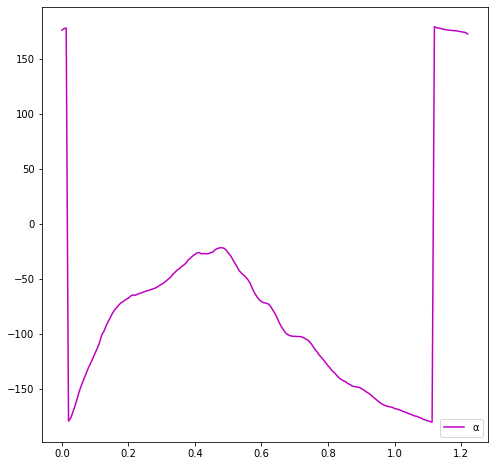

In [ ]:
plt.plot(data['Time'], alpha, 'm', label= '\u03B1')
plt.legend()

# **Gráfico de beta**

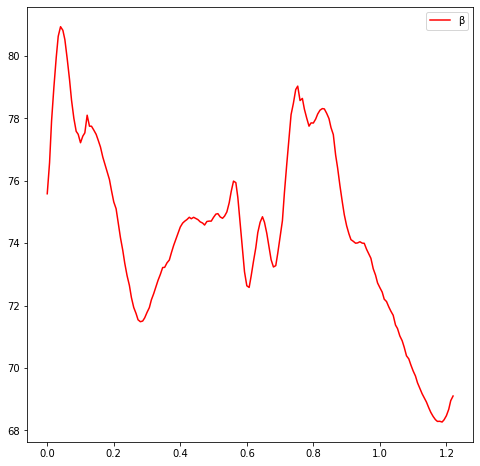

In [ ]:
plt.plot(data['Time'], beta, 'r', label= '\u03B2')
plt.legend()

# **Gráfico de gama**

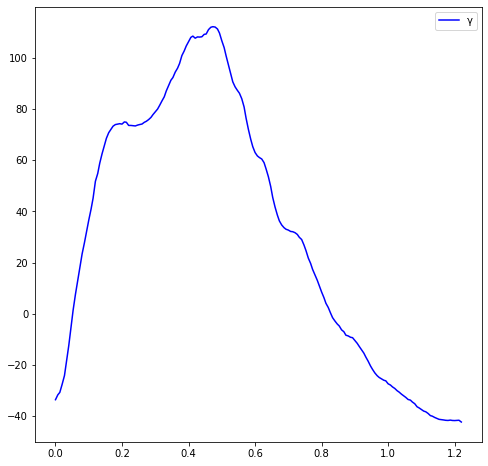

In [ ]:
plt.plot(data['Time'], gamma, 'b', label= '\u03B3')
plt.legend()

# **Cálculo da velocidade angular**

**Deve-se então definir um período de amostragem (dt) para que possa ser calculada a variação angular em função do tempo, o cálculo a ser realizado segue a equação a seguir**

<span class="notranslate">
 \begin{equation}
    \vec{\omega} =  \left(\frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_1}} + \left(\frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}\right) \hat{\boldsymbol{e_2}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_3}}
\end{equation}
</span>

In [ ]:
dt = data['Time'].at[2] - data['Time'].at[1]
print('dt =',"{:.3f}".format(dt),'s')

dt = 0.007 s


In [ ]:
de1_hipdt = np.gradient(e1_hip, dt, axis=0)
print('de1_hip/dt=', "{:.5f}".format(np.mean(de1_hipdt)))

de1_hip/dt= 0.00192


In [ ]:
de2_hipdt = np.gradient(e2_hip, dt, axis=0)
print('de2_hip/dt=', "{:.5f}".format(np.mean(de2_hipdt)))

de2_hip/dt= -0.01222


In [ ]:
de3_hipdt = np.gradient(e3_hip, dt, axis=0)
print('de3_hip/dt=', "{:.5f}".format(np.mean(de3_hipdt)))

de3_hip/dt= -0.00161


In [ ]:
omega1_hip = np.sum(de2_hipdt*e3_hip, axis = 1, keepdims=True)
print('\u03C9_1_hip =', "{:.5f}".format(np.mean(omega1_hip)), 'm/s') 

ω_1_hip = 0.01058 m/s


In [ ]:
omega2_hip = np.sum(de3_hipdt*e1_hip, axis = 1, keepdims=True)
print('\u03C9_2_hip =', "{:.5f}".format(np.mean(omega2_hip)), 'm/s') 

ω_2_hip = 0.01110 m/s


In [ ]:
omega3_hip = np.sum(de1_hipdt*e2_hip, axis = 1, keepdims=True)
print('\u03C9_3_hip =', "{:.5f}".format(np.mean(omega3_hip)), 'm/s') 

ω_3_hip = -0.04614 m/s


In [ ]:
omega_hip = np.hstack((omega1_hip, omega2_hip, omega3_hip))
print('\u03C9_hip =', "{:.5f}".format(np.mean(omega_hip)), 'm/s') 

ω_hip = -0.00815 m/s


**Portanto a velocidade angular do quadril é ω_hip = -0.00815 m/s**


In [ ]:
de1_femurdt = np.gradient(e1_femur, dt, axis=0)
print('de1_femur/dt=', "{:.5f}".format(np.mean(de1_femurdt)))

de1_femur/dt= 0.01795


In [ ]:
de2_femurdt = np.gradient(e2_femur, dt, axis=0)
print('de2_femur/dt=', "{:.5f}".format(np.mean(de2_femurdt)))

de2_femur/dt= 0.04861


In [ ]:
de3_femurdt = np.gradient(e3_femur, dt, axis=0)
print('de3_femur/dt=', "{:.5f}".format(np.mean(de3_femurdt)))

de3_femur/dt= -0.04298


In [ ]:
omega1_femur = np.sum(de2_femurdt*e3_femur, axis = 1, keepdims=True)
print('\u03C9_1_femur =', "{:.5f}".format(np.mean(omega1_femur)), 'm/s') 

ω_1_femur = 0.12349 m/s


In [ ]:
omega2_femur = np.sum(de3_femurdt*e1_femur, axis = 1, keepdims=True)
print('\u03C9_2_femur =', "{:.5f}".format(np.mean(omega2_femur)), 'm/s') 

ω_2_femur = -0.07247 m/s


In [ ]:
omega3_femur = np.sum(de1_femurdt*e2_femur, axis = 1, keepdims=True)
print('\u03C9_3_femur =', "{:.5f}".format(np.mean(omega3_femur)), 'm/s') 

ω_3_femur = 0.16000 m/s


In [ ]:
omega_femur = np.hstack((omega1_hip, omega2_hip, omega3_hip))
print('\u03C9_femur =', "{:.5f}".format(np.mean(omega_femur)), 'm/s') 

ω_femur = -0.00815 m/s


**Como esperado a velocidade angular do femur deu a mesma que a do quadril por fazerem parte da mesma ligação (ω = -0.00815 m/s)**

2. [1 ponto] Com o mesmo arquivo do problema anterior, faça agora uma análise bidimensional e determine somente o ângulo da articulação do quadril direito no plano sagital (flexão/extensão). Plote este ângulo e compare com o obtido anterioremente.  
Dica: para tanto, utilize somente as duas coordenadas relevantes neese caso das três coordenadas de cada marca que você escolher.

In [ ]:
R_ASIS = data[['R.ASIS_Y','R.ASIS_Z']].values/1000
GT = data[['R.GTR_Y','R.GTR_Z']].values/1000
v1_hip_2D = GT - R_ASIS
v1norm_hip_2D = np.linalg.norm(v1_hip_2D, axis=1, keepdims=True)

e1_hip_2D = v1_hip_2D/v1norm_hip_2D

In [ ]:
np.all(np.isclose(np.linalg.norm(e1_hip_2D, axis=1),1))

True

In [ ]:
k = np.array([0,0,1])
e2_hip_2D = np.cross(k, e1_hip_2D)[:,[0,1]]
np.all(np.isclose(np.linalg.norm(e2_hip_2D, axis=1),1))

True

In [ ]:
np.all(np.isclose(np.sum(e1_hip_2D*e2_hip_2D, axis=1),0))

True

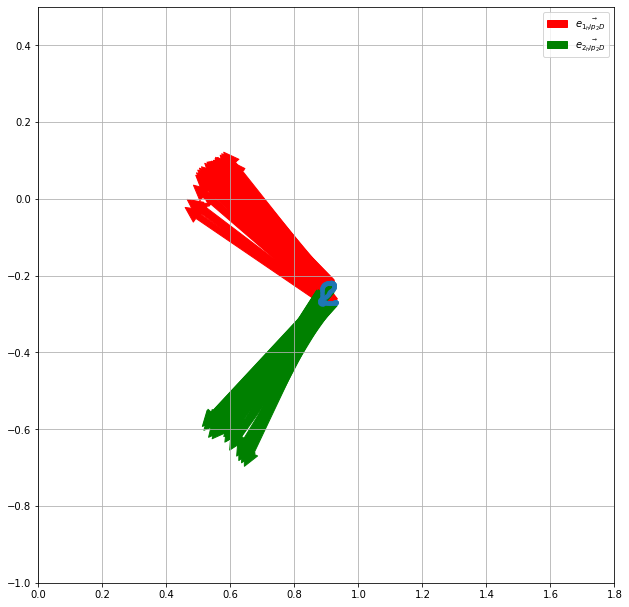

In [ ]:
plt.rcParams['figure.figsize'] = (8,8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(GT[:,0],GT[:,1],'.')
for i in np.arange(0,len(GT),5):
    vec1 = FancyArrowPatch(GT[i,:],GT[i,:]+0.5*e1_hip_2D[i,:], mutation_scale=30,color='r', label='e_1')
    vec2 = FancyArrowPatch(GT[i,:],GT[i,:]+0.5*e2_hip_2D[i,:],mutation_scale=30,color='g', label='e_2')
    ax.add_artist(vec1)
    ax.add_artist(vec2)
plt.xlim((0,1.8))
plt.ylim((-1,0.5))
plt.grid()
plt.legend([vec1, vec2],[r'$\vec{e_{1_hip_2D}}$', r'$\vec{e_{2_hip_2D}}$'])
plt.show()

In [ ]:
R_Knee = data[['R.Knee_Y','R.Knee_Z']].values/1000

In [ ]:
v1_femur_2D = R_Knee - GT
e1_femur_2D = v1_femur_2D/np.linalg.norm(v1_femur_2D, axis=1, keepdims=True)

In [ ]:
np.all(np.isclose(np.linalg.norm(e1_femur_2D,axis=1), 1))

True

In [ ]:
e2_femur_2D = np.cross(k, e1_femur_2D)[:,[0,1]]

In [ ]:
np.all(np.isclose(np.linalg.norm(e2_femur_2D,axis=1), 1))

True

In [ ]:
np.all(np.isclose(np.sum(e1_femur_2D*e2_femur_2D, axis=1),0))

True

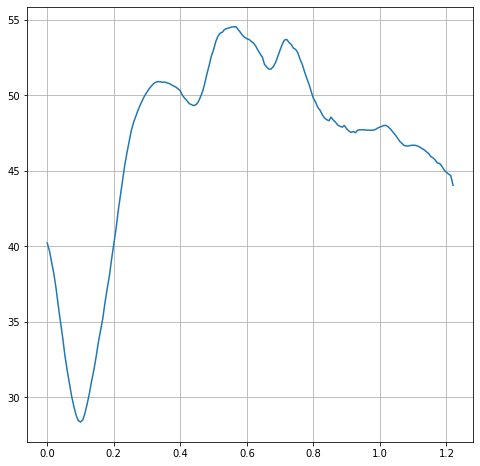

In [ ]:
RG_hip = np.stack((e1_hip_2D, e2_hip_2D), axis=2)
RG_femur = np.stack((e1_femur_2D, e2_femur_2D), axis=2)
RG_femur_Transposta = np.transpose(RG_femur, (0,2,1))
R_femur_hip = np.matmul(RG_femur_Transposta, RG_hip)
angulo_quadril = 180/np.pi*np.arctan2(R_femur_hip[:, 1, 0], R_femur_hip[:, 0, 0])
plt.plot(data['Time'], - angulo_quadril)
plt.grid()

In [ ]:
np.mean(angulo_quadril)

-46.880074421169056